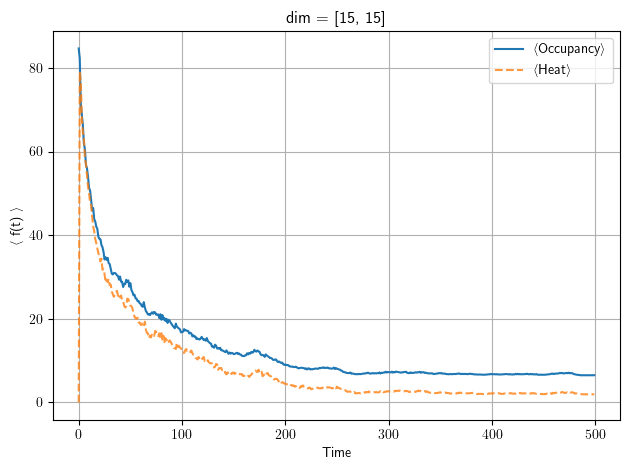

Plot Saved!


,block,bee_hive,loaf,boat,ship,tub,pond,blinker,toad,beacon,glider
dimension,,,,,,,,,,,
"[15, 15]",611,97,36,66,14,20,2,1118,10,1,397


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

def consecutive(data, stepsize=1):    
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

pattern_period = {"block" : 1, "bee_hive" : 1, "loaf" : 1, "boat" : 1, "ship" : 1, "tub" : 1, "pond" : 1, "blinker" : 1, "toad" : 2, "beacon" : 2, "glider":4}


folder_name = 'data/'
all_dim = [[i, i] for i in [15]]    #, 20, 25, 30, 35, 40
all_seed = list(range(100, 200)) 
native = 37.5 
all_native = [native]
graph = True
iterations = 500
list_iterations = list(range(iterations))      # This is useful when decomposing the dataframe

patterns = ['block', 'bee_hive', 'loaf', 'boat', 'ship', 'tub', 'pond', 'blinker', 'toad', 'beacon', 'glider']
others = ['heat', 'occupancy']
columns = patterns + others

# Analysis of occupancies and heats

# tuples = [(str(dim), str(native)) for dim in all_dim]
# index = pd.MultiIndex.from_tuples(tuples, names=['dimension', 'natives'])
index = [(str(dim)) for dim in all_dim]
all_freq, all_lives = [], []
for dim in all_dim:
    df = pd.DataFrame(columns=columns)
    for seed in all_seed:
        file_name = folder_name+str(dim[0])+"_"+str(dim[1])+"/"+str(seed)+'.csv'
        df_tmp = pd.read_csv(file_name, sep=';', skiprows=[0], names=columns, header=None)
        for col in df_tmp.columns:
            df_tmp[col] = df_tmp[col].apply(lambda x: ast.literal_eval(str(x)))
        df = pd.concat([df, df_tmp], ignore_index=True)
    
    # Analysis of occupancies and heats
    n = len(all_seed)
    df_per_native = df[others]
    df_res = pd.DataFrame([((lambda z: df_per_native.loc[z:df.shape[0]:iterations])(z)).mean() for z in list_iterations])     # In this way we average on same time for different seeds
    if graph:
        plt.rcParams['text.usetex'] = True
        plt.title(f"dim = {dim}")
        plt.plot(df_res['occupancy'], label=r'$\langle$Occupancy$\rangle$', color='tab:blue')
        plt.plot(df_res['heat'], label=r'$\langle$Heat$\rangle$', ls='--', alpha=0.8, color='tab:orange')
        plt.xlabel('Time')
        plt.ylabel(r'$\langle$ f(t) $\rangle$')
        plt.legend(loc='best')
        plt.grid()
        plt.tight_layout()
        plt.savefig('plots/'+str(dim[0])+"_"+str(dim[1])+'.png', bbox_inches='tight', dpi=300)
        plt.show()
        print("Plot Saved!")
    
    # Analysis of frequencies and average lives
    frequencies, lives = [], []
    for col in patterns:
        keep_track = []
        df_frequencies = df[col]
        df_frequencies = df_frequencies[df_frequencies != 0].dropna()
        
        for i in range(df_frequencies.shape[0]):
            element = df_frequencies.iloc[i]
            
            for sub_element in element:
                chir, rot, x, y = sub_element
                keep_track.append([x, y, chir, rot, df_frequencies.index[i]])      
        df_keep_track = pd.DataFrame(keep_track, columns=['x', 'y', 'chir', 'rot', 'time'])
        
        unique_lists_in_items = df_keep_track.groupby(['x', 'y', 'chir'])['time'].apply(consecutive, stepsize=pattern_period[col])  # .to_numpy()
        freq = 0
        life = []
        for k in range(len(unique_lists_in_items)):
            tmp = unique_lists_in_items.iloc[k]
            freq += len(tmp)
            for j in range(len(tmp)):
                life.append(len(tmp[j]))
                    
        frequencies.append(freq)
        lives.append(sum(life)/freq)

    all_freq.append(frequencies)
    all_lives.append(lives)

df_final = pd.DataFrame(all_freq, index=index, columns=patterns)
df_final.index.name = 'dimension'
df_final

In [14]:
df_lives = pd.DataFrame(all_lives, index=index, columns=patterns)
df_lives.index.name = 'dimension'
df_lives

,block,bee_hive,loaf,boat,ship,tub,pond,blinker,toad,beacon,glider
dimension,,,,,,,,,,,
"[15, 15]",33.050736,89.886598,131.638889,64.348485,35.642857,44.2,1.5,15.093918,1.0,193.0,1.0


In [15]:
rows = [df_final.iloc[i].sum() for i in range(1)]
df_final2 = df_final/np.array(rows).reshape(len(rows), -1)
df_final2

,block,bee_hive,loaf,boat,ship,tub,pond,blinker,toad,beacon,glider
dimension,,,,,,,,,,,
"[15, 15]",0.257589,0.040894,0.015177,0.027825,0.005902,0.008432,0.000843,0.471332,0.004216,0.000422,0.167369


ValueError: The length of `title` must equal the number of columns if using `title` of type `list` and `subplots=True`.
length of title = 2
number of columns = 1

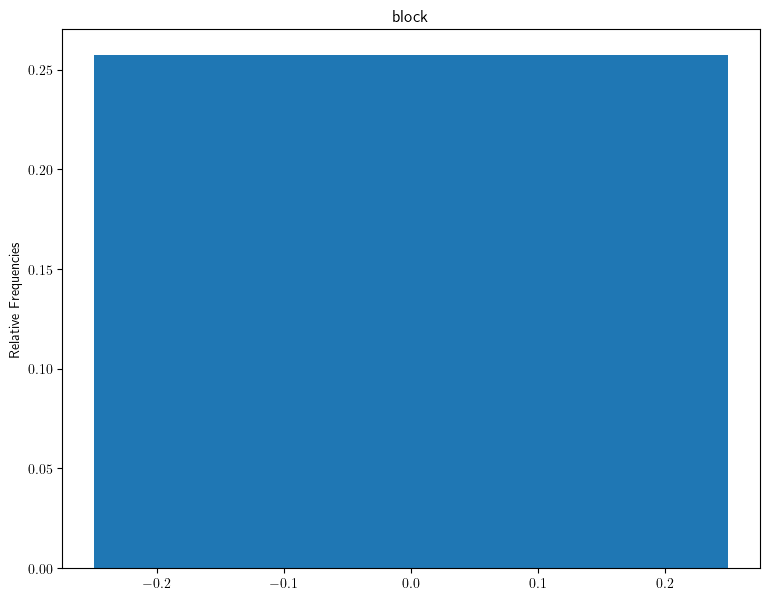

In [17]:
for col in patterns:
    ax = df_final2[col].plot(kind='bar', subplots=True, title=[col, col], figsize=(9, 7), xlabel='Natives', ylabel='Relative Frequencies')#, layout=(2, 2))
    plt.tight_layout()
    plt.tight_layout()
    plt.show()
    plt.savefig('plots/'+col+"_"+col+'.png', bbox_inches='tight', dpi=300)